<a href="https://colab.research.google.com/github/brian-lear/study/blob/main/Pytorch_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression Model

In [1]:
import torch
from torch import nn

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [3]:
# Create weight and bias
weight = 0.7
bias = 0.3

# Create range values
start = 0
end = 1
step = 0.002

# Create X and y (features and labels)
X = torch.arange(start, end, step).unsqueeze(dim=1) # without unsqueeze, errors will happen later on (shapes within linear layers)
y = weight * X + bias
X[:10], y[:10]

(tensor([[0.0000],
         [0.0020],
         [0.0040],
         [0.0060],
         [0.0080],
         [0.0100],
         [0.0120],
         [0.0140],
         [0.0160],
         [0.0180]]),
 tensor([[0.3000],
         [0.3014],
         [0.3028],
         [0.3042],
         [0.3056],
         [0.3070],
         [0.3084],
         [0.3098],
         [0.3112],
         [0.3126]]))

In [4]:
# train test split

train_size = 0.8
n_samples = len(X)
train_max_index = int(n_samples*train_size)

X_train = X[:train_max_index]
y_train = y[:train_max_index]

X_test = X[train_max_index:]
y_test = y[train_max_index:]

len(X_train), len(y_train), len(X_test), len(y_test)

(400, 400, 100, 100)

In [5]:
# model

class RegressionModel(nn.Module):
  def __init__(self, in_shape, hidden_units, out_shape):
    super().__init__()

    self.layers = nn.Sequential(
        nn.Linear(in_features = in_shape, out_features=hidden_units),
        nn.Linear(in_features = hidden_units, out_features=hidden_units),
        nn.Linear(in_features = hidden_units, out_features=out_shape),
    )

  def forward(self, x):
    return self.layers(x)

reg_model = RegressionModel(in_shape = 1,
                            hidden_units = 8,
                            out_shape = 1).to(device)
reg_model, reg_model.state_dict()

(RegressionModel(
   (layers): Sequential(
     (0): Linear(in_features=1, out_features=8, bias=True)
     (1): Linear(in_features=8, out_features=8, bias=True)
     (2): Linear(in_features=8, out_features=1, bias=True)
   )
 ),
 OrderedDict([('layers.0.weight',
               tensor([[-0.2809],
                       [ 0.5313],
                       [ 0.2147],
                       [ 0.1875],
                       [-0.2952],
                       [-0.6434],
                       [-0.4790],
                       [-0.0922]], device='cuda:0')),
              ('layers.0.bias',
               tensor([ 0.3081, -0.7706, -0.8959, -0.1042, -0.6538,  0.3720, -0.1806, -0.9329],
                      device='cuda:0')),
              ('layers.1.weight',
               tensor([[ 0.1478,  0.2676,  0.0140,  0.2331, -0.0750,  0.0635, -0.2052, -0.2085],
                       [ 0.1413,  0.2240, -0.0649, -0.0733, -0.2366,  0.1241, -0.0274,  0.2405],
                       [-0.1666, -0.2867,  0.216

In [6]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(reg_model.parameters(), lr=0.1)

In [7]:
torch.manual_seed(601)
torch.cuda.manual_seed(601)

epochs = 1000
train_loss_list = []
test_loss_list = []

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):

  reg_model.train()

  preds = reg_model(X_train)

  loss = loss_fn(preds,y_train)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  reg_model.eval()
  with torch.inference_mode():

    preds = reg_model(X_test)
    test_loss = loss_fn(preds,y_test)

  if epoch % 100 == 0:
    print(f'Epoch: {epoch}, Train Loss: {loss}, Test Loss: {test_loss}')


Epoch: 0, Train Loss: 0.3862546980381012, Test Loss: 0.5565798282623291
Epoch: 100, Train Loss: 0.06707584857940674, Test Loss: 0.18524177372455597
Epoch: 200, Train Loss: 0.08051955699920654, Test Loss: 0.15987582504749298
Epoch: 300, Train Loss: 0.06463833153247833, Test Loss: 0.1575888842344284
Epoch: 400, Train Loss: 0.05517452955245972, Test Loss: 0.11995439976453781
Epoch: 500, Train Loss: 0.05655868351459503, Test Loss: 0.12297317385673523
Epoch: 600, Train Loss: 0.05179058015346527, Test Loss: 0.12168541550636292
Epoch: 700, Train Loss: 0.0625728890299797, Test Loss: 0.14335720241069794
Epoch: 800, Train Loss: 0.0444013886153698, Test Loss: 0.11556356400251389
Epoch: 900, Train Loss: 0.05895763263106346, Test Loss: 0.11806803196668625


In [8]:
next(reg_model.parameters()).device

device(type='cuda', index=0)

In [9]:
reg_model.eval()

with torch.inference_mode():
  preds = reg_model(X_test)

preds[:10], y_test[:10]

(tensor([[0.8600],
         [0.8611],
         [0.8622],
         [0.8634],
         [0.8645],
         [0.8656],
         [0.8668],
         [0.8679],
         [0.8690],
         [0.8701]], device='cuda:0'),
 tensor([[0.8600],
         [0.8614],
         [0.8628],
         [0.8642],
         [0.8656],
         [0.8670],
         [0.8684],
         [0.8698],
         [0.8712],
         [0.8726]], device='cuda:0'))

In [10]:
# save model

from pathlib import Path

MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents=True, exist_ok= True)

MODEL_NAME = 'regmodel.pth'
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

torch.save(obj=reg_model.state_dict(), f=MODEL_SAVE_PATH)

In [11]:
# load model

loaded_model = RegressionModel(in_shape = 1,
                            hidden_units = 8,
                            out_shape = 1).to(device)
loaded_model.load_state_dict(torch.load(MODEL_SAVE_PATH))
loaded_model.to(device)
loaded_model

RegressionModel(
  (layers): Sequential(
    (0): Linear(in_features=1, out_features=8, bias=True)
    (1): Linear(in_features=8, out_features=8, bias=True)
    (2): Linear(in_features=8, out_features=1, bias=True)
  )
)

In [12]:
loaded_model.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model(X_test)
preds[:10] == loaded_model_preds[:10]

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')

# Classification Model - Single Class

In [13]:
import torch
from torch import nn

In [14]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [15]:
from sklearn.datasets import make_circles
import pandas as pd

# Make 1000 samples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03, # a little bit of noise to the dots
                    random_state=42)

# Make DataFrame of circle data
circles = pd.DataFrame({"X1": X[:, 0],
    "X2": X[:, 1],
    "label": y
})
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


In [16]:
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)
X.shape, y.shape

(torch.Size([1000, 2]), torch.Size([1000]))

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.8, random_state = 601)

len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

In [18]:
class SingleClassifierModel(nn.Module):
  def __init__(self, in_shape, hidden_units, out_shape):
    super().__init__()

    self.layers = nn.Sequential(
        nn.Linear(in_features=in_shape, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=out_shape),
    )

  def forward(self,x):
    return self.layers(x)

class_model = SingleClassifierModel(in_shape=2, hidden_units=10, out_shape=1).to(device)
class_model

SingleClassifierModel(
  (layers): Sequential(
    (0): Linear(in_features=2, out_features=10, bias=True)
    (1): ReLU()
    (2): Linear(in_features=10, out_features=10, bias=True)
    (3): ReLU()
    (4): Linear(in_features=10, out_features=1, bias=True)
  )
)

In [19]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(class_model.parameters(), lr=0.1)

In [20]:
try:
  from torchmetrics.classification import BinaryAccuracy
except:
  !pip install torchmetrics
  from torchmetrics.classification import BinaryAccuracy


In [21]:
acc_fn = BinaryAccuracy().to(device)

In [22]:
torch.cuda.manual_seed(601)
torch.manual_seed(601)

epochs = 1000

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):

  class_model.train()

  logits = class_model(X_train).squeeze()
  y_pred_proba = torch.sigmoid(logits)
  y_pred = torch.round(y_pred_proba)

  loss = loss_fn(logits, y_train)
  acc = acc_fn(y_pred,y_train)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  class_model.eval()
  with torch.inference_mode():
    logits = class_model(X_test).squeeze()
    y_pred_proba = torch.sigmoid(logits)
    y_pred = torch.round(y_pred_proba)

    loss_test = loss_fn(logits, y_test)
    acc_test = acc_fn(y_pred,y_test)

  if epoch % 100 == 0:
    print(f'Epoch: {epoch}, Train Loss: {loss}, Train Acc: {acc}, Test Loss: {loss_test}, Test Acc: {acc_test}')

Epoch: 0, Train Loss: 0.7047103047370911, Train Acc: 0.4937500059604645, Test Loss: 0.6940680742263794, Test Acc: 0.5249999761581421
Epoch: 100, Train Loss: 0.6923341155052185, Train Acc: 0.574999988079071, Test Loss: 0.6911073923110962, Test Acc: 0.5849999785423279
Epoch: 200, Train Loss: 0.6901578903198242, Train Acc: 0.6075000166893005, Test Loss: 0.6901924014091492, Test Acc: 0.6100000143051147
Epoch: 300, Train Loss: 0.6875978708267212, Train Acc: 0.6337500214576721, Test Loss: 0.6883881092071533, Test Acc: 0.625
Epoch: 400, Train Loss: 0.6839185953140259, Train Acc: 0.6312500238418579, Test Loss: 0.6855964660644531, Test Acc: 0.6150000095367432
Epoch: 500, Train Loss: 0.6774665713310242, Train Acc: 0.6349999904632568, Test Loss: 0.6805399656295776, Test Acc: 0.6100000143051147
Epoch: 600, Train Loss: 0.6671475172042847, Train Acc: 0.6587499976158142, Test Loss: 0.6709545254707336, Test Acc: 0.625
Epoch: 700, Train Loss: 0.6496069431304932, Train Acc: 0.7225000262260437, Test Loss

# Classification Model - Multi Class

In [23]:
import torch
from torch import nn

In [24]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [25]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# Set the hyperparameters for data creation
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

# 1. Create multi-class data
X, y = make_blobs(n_samples=1000,
    n_features=NUM_FEATURES, # X features
    centers=NUM_CLASSES, # y labels
    cluster_std=1.5, # give the clusters a little shake up (try changing this to 1.0, the default)
    random_state=RANDOM_SEED
)

X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y)

X[:10], y[:10]

(tensor([[-8.4134,  6.9352],
         [-5.7665, -6.4312],
         [-6.0421, -6.7661],
         [ 3.9508,  0.6984],
         [ 4.2505, -0.2815],
         [-6.7941, -6.4772],
         [ 5.2102,  2.8890],
         [-5.5051, -6.3604],
         [-6.5438, -4.8339],
         [ 6.4496,  0.7478]]),
 tensor([3, 2, 2, 1, 1, 2, 1, 2, 2, 1]))

In [26]:
n_classes = int(max(torch.unique(y)) + 1)
n_classes

4

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, random_state = 601)

In [28]:
class MultiClassifierModel(nn.Module):
  def __init__(self,in_shape, hidden_units, out_shape):
    super().__init__()

    self.layers = nn.Sequential(
        nn.Linear(in_features=in_shape, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=out_shape),
    )

  def forward(self,x):
    return self.layers(x)

mclass_model = MultiClassifierModel(in_shape=2,
                                    hidden_units=10,
                                    out_shape=n_classes).to(device)
mclass_model

MultiClassifierModel(
  (layers): Sequential(
    (0): Linear(in_features=2, out_features=10, bias=True)
    (1): ReLU()
    (2): Linear(in_features=10, out_features=10, bias=True)
    (3): ReLU()
    (4): Linear(in_features=10, out_features=4, bias=True)
  )
)

In [29]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(mclass_model.parameters(), lr=0.1)

In [30]:
try:
  from torchmetrics.classification import MulticlassAccuracy
except:
  !pip install torchmetrics
  from torchmetrics.classification import MulticlassAccuracy


In [31]:
acc_fn = MulticlassAccuracy(num_classes=n_classes).to(device)

In [32]:
torch.cuda.manual_seed(601)
torch.manual_seed(601)

epochs = 1000

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):

  mclass_model.train()

  logits = mclass_model(X_train)
  y_pred_probas = torch.softmax(logits,dim=1)
  y_pred = torch.argmax(y_pred_probas,dim=1)

  loss = loss_fn(logits,y_train)
  acc = acc_fn(y_pred,y_train)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  mclass_model.eval()
  with torch.inference_mode():
    logits = mclass_model(X_test)
    y_pred_probas = torch.softmax(logits,dim=1)
    y_pred = torch.argmax(y_pred_probas,dim=1)

    loss_test = loss_fn(logits,y_test)
    acc_test = acc_fn(y_pred,y_test)

  if epoch % 100 == 0:
    print(f'Epoch: {epoch}, Train Loss: {loss:.5}, Train Acc: {acc:.2f}%, Test Loss: {loss_test:.5}, Test Acc: {acc_test:.2f}%')

Epoch: 0, Train Loss: 1.3452, Train Acc: 0.37%, Test Loss: 1.219, Test Acc: 0.49%
Epoch: 100, Train Loss: 0.027071, Train Acc: 0.99%, Test Loss: 0.047189, Test Acc: 0.99%
Epoch: 200, Train Loss: 0.019319, Train Acc: 0.99%, Test Loss: 0.046727, Test Acc: 0.99%
Epoch: 300, Train Loss: 0.017058, Train Acc: 0.99%, Test Loss: 0.048715, Test Acc: 0.99%
Epoch: 400, Train Loss: 0.015954, Train Acc: 0.99%, Test Loss: 0.050546, Test Acc: 0.99%
Epoch: 500, Train Loss: 0.015273, Train Acc: 0.99%, Test Loss: 0.052025, Test Acc: 0.99%
Epoch: 600, Train Loss: 0.01479, Train Acc: 0.99%, Test Loss: 0.05315, Test Acc: 0.99%
Epoch: 700, Train Loss: 0.014404, Train Acc: 0.99%, Test Loss: 0.054015, Test Acc: 0.99%
Epoch: 800, Train Loss: 0.014075, Train Acc: 0.99%, Test Loss: 0.05466, Test Acc: 0.99%
Epoch: 900, Train Loss: 0.01379, Train Acc: 0.99%, Test Loss: 0.055132, Test Acc: 0.99%


# Image Detection Model - no data Augmentation

In [33]:
import torch
from torch import nn

from torchvision import datasets
from torchvision.transforms import ToTensor

In [34]:
# Setup training data
train_data = datasets.FashionMNIST(
    root="data", # where to download data to?
    train=True, # get training data
    download=True, # download data if it doesn't exist on disk
    transform=ToTensor(), # images come as PIL format, we want to turn into Torch tensors
    target_transform=None # you can transform labels as well
)

# Setup testing data
test_data = datasets.FashionMNIST(
    root="data",
    train=False, # get test data
    download=True,
    transform=ToTensor()
)

len(train_data.data), len(train_data.targets), len(test_data.data), len(test_data.targets)

(60000, 60000, 10000, 10000)

In [35]:
class_names = train_data.classes

In [36]:
train_data.classes, train_data.class_to_idx

(['T-shirt/top',
  'Trouser',
  'Pullover',
  'Dress',
  'Coat',
  'Sandal',
  'Shirt',
  'Sneaker',
  'Bag',
  'Ankle boot'],
 {'T-shirt/top': 0,
  'Trouser': 1,
  'Pullover': 2,
  'Dress': 3,
  'Coat': 4,
  'Sandal': 5,
  'Shirt': 6,
  'Sneaker': 7,
  'Bag': 8,
  'Ankle boot': 9})

Image shape: torch.Size([1, 28, 28])


Text(0.5, 1.0, '9')

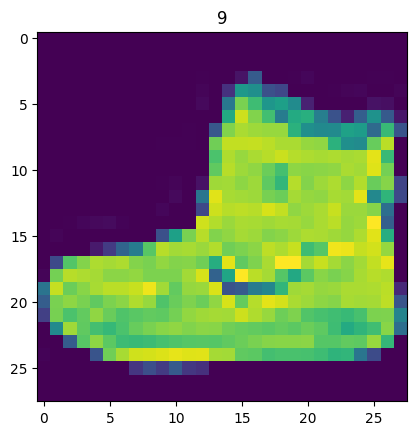

In [37]:
import matplotlib.pyplot as plt

image, label = train_data[0]
print(f'Image shape: {image.shape}')
plt.imshow(image.squeeze())
plt.title(label)

In [38]:
from torch.utils.data import DataLoader
import os

BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()

print(f"Creating DataLoader's with batch size {BATCH_SIZE} and {NUM_WORKERS} workers.")

train_dataloader = DataLoader(train_data,
                              shuffle=True,
                              batch_size=BATCH_SIZE,
                              num_workers = NUM_WORKERS)

test_dataloader = DataLoader(test_data,
                             shuffle=False,
                              batch_size=BATCH_SIZE,
                             num_workers = NUM_WORKERS)

Creating DataLoader's with batch size 32 and 2 workers.


In [39]:
image, _ = train_data[0]
image = image.squeeze()
image_shape = image.shape
h,w = image_shape

In [40]:
class ImageModel(nn.Module):
  def __init__(self,input_shape, hidden_units, output_shape, image_h, image_w):
    super().__init__()

    self.layers = nn.Sequential(
        nn.Conv2d(in_channels=input_shape, out_channels=hidden_units, kernel_size=3, padding=1, stride= 1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride= 2)
    )

    # After MaxPool2d(2): H' = image_h//2, W' = image_w//2
    flat_features = hidden_units * (image_h // 2) * (image_w // 2)

    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=flat_features, out_features=output_shape)
    )

  def forward(self, x):
    return self.classifier(self.layers(x))

image_model = ImageModel(input_shape= 1, hidden_units= 10, output_shape= len(class_names), image_h= h, image_w= w).to(device)
image_model

ImageModel(
  (layers): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1960, out_features=10, bias=True)
  )
)

In [41]:
try:
  from torchinfo import summary
except:
  !pip install torchinfo
  from torchinfo import summary

In [42]:
from torchinfo import summary

summary(image_model, input_size=[1,1,28,28])

Layer (type:depth-idx)                   Output Shape              Param #
ImageModel                               [1, 10]                   --
├─Sequential: 1-1                        [1, 10, 14, 14]           --
│    └─Conv2d: 2-1                       [1, 10, 28, 28]           100
│    └─ReLU: 2-2                         [1, 10, 28, 28]           --
│    └─MaxPool2d: 2-3                    [1, 10, 14, 14]           --
├─Sequential: 1-2                        [1, 10]                   --
│    └─Flatten: 2-4                      [1, 1960]                 --
│    └─Linear: 2-5                       [1, 10]                   19,610
Total params: 19,710
Trainable params: 19,710
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 0.10
Input size (MB): 0.00
Forward/backward pass size (MB): 0.06
Params size (MB): 0.08
Estimated Total Size (MB): 0.14

In [43]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(image_model.parameters(), lr=0.1)

In [44]:
from torchmetrics.classification import MulticlassAccuracy

acc_fn = MulticlassAccuracy(num_classes=len(class_names)).to(device)

In [45]:
torch.cuda.manual_seed(601)
torch.manual_seed(601)

epochs = 5


for epoch in range(epochs):
  train_loss, train_acc = 0, 0
  image_model.train()
  for batch, (X,y) in enumerate(train_dataloader):
    X,y = X.to(device), y.to(device)

    y_pred_probas = image_model(X)
    y_preds = torch.argmax(y_pred_probas,dim=1)

    loss = loss_fn(y_pred_probas, y)
    acc = acc_fn(y_preds, y)
    train_loss += loss
    train_acc += acc

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  train_loss /= len(train_dataloader)
  train_acc /= len(train_dataloader)

  test_loss, test_acc = 0, 0
  image_model.eval()
  with torch.inference_mode():
    for X,y in test_dataloader:
      X,y = X.to(device), y.to(device)

      y_pred_probas = image_model(X)
      y_preds = torch.argmax(y_pred_probas,dim=1)

      loss = loss_fn(y_pred_probas, y)
      acc = acc_fn(y_preds, y)
      test_loss += loss
      test_acc += acc

    test_loss /= len(test_dataloader)
    test_acc /= len(test_dataloader)

  print(f'Epoch: {epoch}, Train Loss: {train_loss:.3}, Train Acc: {train_acc*100:.2f}%, Test Loss: {test_loss:.3}, Test Acc: {test_acc*100:.2f}%')

Epoch: 0, Train Loss: 0.504, Train Acc: 81.35%, Test Loss: 0.416, Test Acc: 84.68%
Epoch: 1, Train Loss: 0.359, Train Acc: 86.46%, Test Loss: 0.368, Test Acc: 85.71%
Epoch: 2, Train Loss: 0.327, Train Acc: 87.57%, Test Loss: 0.35, Test Acc: 86.43%
Epoch: 3, Train Loss: 0.307, Train Acc: 88.23%, Test Loss: 0.331, Test Acc: 87.32%
Epoch: 4, Train Loss: 0.292, Train Acc: 89.01%, Test Loss: 0.311, Test Acc: 87.95%


In [46]:
test_data

Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [47]:
image_model.eval()
y_preds = []
with torch.inference_mode():
  for x, _ in test_dataloader:
    x = x.to(device)
    logits = image_model(x)
    pred_probas = torch.softmax(logits, dim=1)
    y_pred = torch.argmax(pred_probas, dim=1)
    y_preds.append(y_pred.cpu())

y_pred_tensor = torch.cat(y_preds, dim=0)
y_pred_tensor.shape

torch.Size([10000])

In [48]:
# See if torchmetrics exists, if not, install it
try:
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")
    assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend verison should be 0.19.0 or higher"
except:
    !pip install -q torchmetrics -U mlxtend # <- Note: If you're using Google Colab, this may require restarting the runtime
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")

mlxtend version: 0.23.4


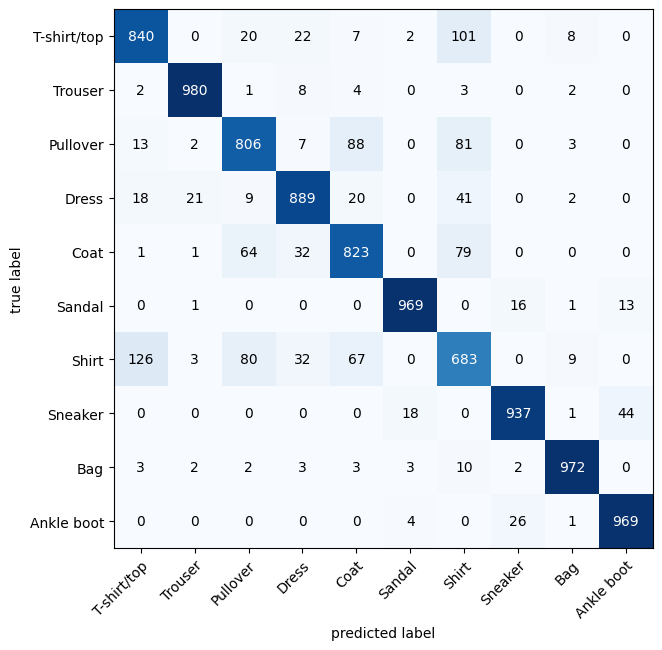

In [49]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

confmat = ConfusionMatrix(num_classes = len(class_names), task='multiclass')
confmat_tensor = confmat(preds=y_pred_tensor,target=test_data.targets)

fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(),
    class_names=class_names,
    figsize=(10, 7)
);

# Image Detection Model - with Augmentation

In [50]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [51]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [52]:
# check original images

check_images = datasets.Flowers102(
    root="data", # where to download data to?
    # train=True, # get training data
    split = 'test',
    download=True, # download data if it doesn't exist on disk
    transform=transforms.ToTensor(),
    target_transform=None # you can transform labels as well
)

In [53]:
data_transform_train = transforms.Compose([
    transforms.Resize(size=(128, 128)),
    # Flip the images randomly on the horizontal
    transforms.RandomHorizontalFlip(p=0.5), # p = probability of flip, 0.5 = 50% chance
    # Turn the image into a torch.Tensor
    transforms.ToTensor() # this also converts all pixel values from 0 to 255 to be between 0.0 and 1.0
])

data_transform_test = transforms.Compose([
    transforms.Resize(size=(128, 128)),
    # Turn the image into a torch.Tensor
    transforms.ToTensor() # this also converts all pixel values from 0 to 255 to be between 0.0 and 1.0
])

In [54]:
# Setup training data
train_data = datasets.Flowers102(
    root="data", # where to download data to?
    split = 'train',
    download=True, # download data if it doesn't exist on disk
    transform=data_transform_train,
    target_transform=None # you can transform labels as well
)

# Setup testing data
test_data = datasets.Flowers102(
    root="data",
    split = 'test',
    download=True,
    transform=data_transform_test,
)

len(train_data), len(test_data)

(1020, 6149)

In [55]:
classes = test_data.classes

Original Image shape: torch.Size([3, 500, 609])
Image shape: torch.Size([3, 128, 128])


(np.float64(-0.5), np.float64(127.5), np.float64(127.5), np.float64(-0.5))

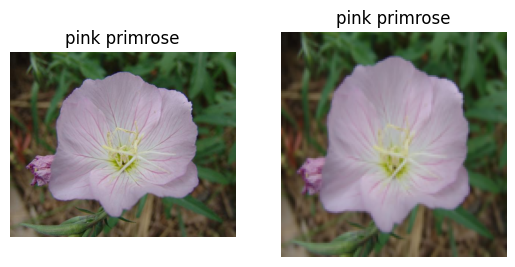

In [56]:
import matplotlib.pyplot as plt
from PIL import Image

im, label_idx = test_data.__getitem__(5)
label = classes[label_idx]
original_im, original_label_idx = check_images.__getitem__(5)
original_label = classes[original_label_idx]
print(f'Original Image shape: {original_im.shape}')
print(f'Image shape: {im.shape}')

fig, ax = plt.subplots(1, 2)
ax[0].imshow(original_im.detach().cpu().permute(1, 2, 0))
ax[0].set_title(original_label)
ax[0].axis("off")

ax[1].imshow(im.detach().cpu().permute(1, 2, 0))
ax[1].set_title(label)
ax[1].axis("off")

In [57]:
from torch.utils.data import DataLoader
import os

BATCH_SIZE = 32
NUM_WORKERS= os.cpu_count()

train_dataloader = DataLoader(
    train_data,
    batch_size = BATCH_SIZE,
    shuffle = True,
    num_workers=NUM_WORKERS
)

test_dataloader = DataLoader(
    test_data,
    batch_size = BATCH_SIZE,
    shuffle = False,
    num_workers=NUM_WORKERS
)

In [58]:
colours, h_pixels, w_pixels = im.shape
h_pixels, w_pixels

(128, 128)

In [59]:
num_classes = len(classes)

In [60]:
try:
  from torchinfo import summary
except:
  !pip install torchinfo
  from torchinfo import summary

In [61]:
class ImageModelV2(nn.Module):
  def __init__(self, in_shape, hidden_units, out_shape, h_pixels, w_pixels):
    super().__init__()

    self.layers = nn.Sequential(
        nn.Conv2d(in_channels=in_shape, out_channels=hidden_units, kernel_size = 3, stride = 1, padding = 1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size = 3, stride = 1, padding = 1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size = 3, stride = 1, padding = 1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2)
    )

    flatten_shape = int(hidden_units * (h_pixels/2) * (w_pixels/2))

    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=flatten_shape, out_features=out_shape)
    )

  def forward(self, x):
    return self.classifier(self.layers(x))

image_model_v2 = ImageModelV2(
    in_shape = 3,
    hidden_units = 32,
    out_shape = num_classes,
    h_pixels = h_pixels,
    w_pixels = w_pixels
).to(device)

summary(image_model_v2,input_size=[1,3,128,128])

Layer (type:depth-idx)                   Output Shape              Param #
ImageModelV2                             [1, 102]                  --
├─Sequential: 1-1                        [1, 32, 64, 64]           --
│    └─Conv2d: 2-1                       [1, 32, 128, 128]         896
│    └─ReLU: 2-2                         [1, 32, 128, 128]         --
│    └─Conv2d: 2-3                       [1, 32, 128, 128]         9,248
│    └─ReLU: 2-4                         [1, 32, 128, 128]         --
│    └─Conv2d: 2-5                       [1, 32, 128, 128]         9,248
│    └─ReLU: 2-6                         [1, 32, 128, 128]         --
│    └─MaxPool2d: 2-7                    [1, 32, 64, 64]           --
├─Sequential: 1-2                        [1, 102]                  --
│    └─Flatten: 2-8                      [1, 131072]               --
│    └─Linear: 2-9                       [1, 102]                  13,369,446
Total params: 13,388,838
Trainable params: 13,388,838
Non-trainable pa

In [62]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(image_model_v2.parameters(), lr=0.01)

In [63]:
try:
  from torchmetrics.classification import MulticlassAccuracy
except:
  !pip install torchmetrics
  from torchmetrics.classification import MulticlassAccuracy

In [64]:
acc_fn = MulticlassAccuracy(num_classes = num_classes).to(device)

In [65]:
image_model_v2.eval()
all_preds = []
y_list = []
with torch.inference_mode():
  i=0
  for batch, (X,y) in enumerate(test_dataloader):
    X, y = X.to(device), y.to(device)
    logits = image_model_v2(X)
    pred_proba = torch.softmax(logits, dim=1)
    y_pred = torch.argmax(pred_proba, dim=1)
    y_list.append(y)
    all_preds.append(y_pred)
    i+=1

    if i >10:
      break
all_preds[0]

tensor([41, 50, 50, 82, 84, 41, 20, 82, 50, 20, 50, 41, 41, 41, 50, 50, 50, 50,
        50, 60, 41, 41, 60, 50, 50, 82, 41, 41, 50, 82, 41, 41],
       device='cuda:0')

In [66]:
y_list[0]

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1], device='cuda:0')

In [67]:
torch.cuda.manual_seed(601)
torch.manual_seed(601)

epochs = 5

for epoch in range(epochs):

  image_model_v2.train()
  train_loss, train_acc = 0, 0
  for batch, (X,y) in enumerate(train_dataloader):
    X, y = X.to(device), y.to(device)

    logits = image_model_v2(X)
    pred_proba = torch.softmax(logits, dim=1)
    y_pred = torch.argmax(pred_proba, dim=1)

    loss = loss_fn(logits, y)
    acc = acc_fn(y_pred, y)

    train_loss += loss
    train_acc += acc

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

  train_loss /= len(train_dataloader)
  train_acc /= len(train_dataloader)

  image_model_v2.eval()
  test_loss, test_acc = 0, 0
  with torch.inference_mode():
    for batch, (X,y) in enumerate(test_dataloader):
      X, y = X.to(device), y.to(device)

      logits = image_model_v2(X)
      pred_proba = torch.softmax(logits, dim=1)
      y_pred = torch.argmax(pred_proba, dim=1)

      loss = loss_fn(logits, y)
      acc = acc_fn(y_pred, y)

      test_loss += loss
      test_acc += acc

    test_loss /= len(test_dataloader)
    test_acc /= len(test_dataloader)

  print(f'Train Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}% | Test Loss: {test_loss:.3} | Test Acc: {test_acc*100:.2f}%')

Train Loss: 4.640 | Train Acc: 0.34% | Test Loss: 4.62 | Test Acc: 0.47%
Train Loss: 4.612 | Train Acc: 2.12% | Test Loss: 4.6 | Test Acc: 0.75%
Train Loss: 4.580 | Train Acc: 2.78% | Test Loss: 4.55 | Test Acc: 0.98%
Train Loss: 4.482 | Train Acc: 3.61% | Test Loss: 4.39 | Test Acc: 0.82%
Train Loss: 4.204 | Train Acc: 4.81% | Test Loss: 4.22 | Test Acc: 1.30%


# Exercises

In [68]:
import numpy as np
import torch

# Step 1: Create a NumPy array of shape (3, 3) with values from 0–8
np_array = np.arange(9).reshape(3, 3)

# 🚩 Task: Convert this numpy array into a PyTorch tensor called `tensor_from_np`
tensor_from_np = torch.from_numpy(np_array)

print("NumPy array:\n", np_array)
print("PyTorch tensor:\n", tensor_from_np)

NumPy array:
 [[0 1 2]
 [3 4 5]
 [6 7 8]]
PyTorch tensor:
 tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])


In [69]:
# Current tensor
tensor_int = torch.tensor([1, 2, 3])

# 🚩 Task: Convert it to dtype float32
tensor_float = tensor_int.type(torch.float)

print("Original dtype:", tensor_int.dtype)
print("Converted dtype:", tensor_float.dtype)


Original dtype: torch.int64
Converted dtype: torch.float32


In [70]:
device = "cuda" if torch.cuda.is_available() else "cpu"

# Create a random tensor
tensor = torch.randn(2, 2)

# 🚩 Task: Move this tensor to the device
tensor_device = tensor.to(device)

print("Device before:", tensor.device)
print("Device after:", tensor_device.device)


Device before: cpu
Device after: cuda:0


In [71]:
# Simulate raw image data (batch of 2, height=28, width=28)
raw_images = torch.randn(2, 28, 28)  # shape [2, 28, 28]

# 🚩 Task: Add the channel dimension so shape becomes [2, 1, 28, 28]
formatted_images = raw_images.unsqueeze(dim=1)

print("Before:", raw_images.shape)
print("After: ", formatted_images.shape)

Before: torch.Size([2, 28, 28])
After:  torch.Size([2, 1, 28, 28])


In [72]:
# how to check device type for model

device = next(image_model_v2.parameters()).device
device

device(type='cuda', index=0)

In [73]:
# answers

# data loader only if I need to run batches? -> for memory purpose. small tabular data does not need it. mostly for images, audio, text and videos
# do I always have to have pixel between 0 and 1? -> for DL yes, but 0-255 is normal RGB representation